## Tkinter production result report with ptt

In [ ]:
import pandas as pd
import datetime

from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from pptx import Presentation
from pptx.dml.color import RGBColor
from pptx.util import Pt,Inches


def ng_monthly_report_ptt(file_path):
    """input: ng data from production
    output: ptt report pareto, ng timeserie, total ng"""
    
    # prepare data
    month = file_path.split("\\")[-1].split(".")[0].split("_")[-1]
    df = pd.read_excel(file_path)
    pivot = pd.pivot_table(df,index="production_date",columns="ng_topic",values="amount",aggfunc="sum",margins=True,margins_name="Total")
    df_ng = pivot.loc[["Total"]].T[:-1]
    df_ng = df_ng.sort_values(by="Total",ascending=False)
    df_ng["cum_percentage"] = round(df_ng["Total"].cumsum()/df_ng["Total"].sum()*100,2)

    # pareto chart
    x = df_ng.index
    y = df_ng["Total"]
    y2 = df_ng["cum_percentage"]
    fig,ax = plt.subplots(figsize=(22,10))
    ax.bar(x,y)
    ax.set_title(f"{month.upper()}'s NG PARETO CHART",fontsize = 40)
    ax.set_xlabel("NG TOPIC",fontsize = 30)
    ax.set_ylabel("FREQUENCY",fontsize = 30)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax2 = ax.twinx()
    ax2.plot(x,y2,color="red",marker="^",ms=10)
    ax2.axhline(90,color="orange",linestyle="dashed")
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.set_ylabel("Cumulative Percentage",fontsize = 30)
    ax2.yaxis.set_tick_params(labelsize=20)
    plt.savefig(r'export\pareto.png') # export pareto png
    
    # ng time serie
    df_time_serie = pivot.drop(columns=["Total"])[:-1]
    fig,ax = plt.subplots(figsize=(22,10))
    ax.plot(df_time_serie)
    ax.set_title(f"{month.upper()}'s NG timeserie",fontsize = 40)
    ax.set_xlabel("production date",fontsize = 30)
    ax.tick_params(labelrotation=60)
    ax.set_ylabel("FREQUENCY",fontsize = 30)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.legend(list(df_time_serie.columns.values),fontsize = 13)
    plt.savefig(r'export\ng_timeserie.png') # export ng time serie

    # total ng
    df_total_ng = pivot['Total'][:-1]
    fig,ax = plt.subplots(figsize=(22,10))
    ax.plot(df_total_ng)
    ax.set_title(f"{month.upper()}'s TOTAL NG",fontsize = 40)
    ax.set_xlabel("production date",fontsize = 30)
    ax.tick_params(labelrotation=60)
    ax.set_ylabel("FREQUENCY",fontsize = 30)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.savefig(r'export\total_ng.png') # export total ng

    #presentation with ppt
    prs = Presentation(r'data\nmb_template.pptx')

    # add cover page
    title_slide_layout = prs.slide_layouts[0] # Create the title slide
    slide = prs.slides.add_slide(title_slide_layout)

    title = slide.shapes.title # Add title
    title.text = "PRODUCTION MONTHLY REPORT"
    title.text_frame.paragraphs[0].font.color.rgb = RGBColor(56, 48, 209)
    title.text_frame.paragraphs[0].font.size = Pt(35)
    title.text_frame.paragraphs[0].font.name = "Arial"
    title.text_frame.paragraphs[0].font.bold = True
    title.text_frame.paragraphs[0].font.underline = True

    subtitle = slide.placeholders[1]
    subtitle.text = "MIC division"
    subtitle.text_frame.paragraphs[0].font.color.rgb = RGBColor(83, 76, 217)
    subtitle.text_frame.paragraphs[0].font.size = Pt(20)
    subtitle.text_frame.paragraphs[0].font.name = "Arial"
    
    # add page 2
    image_slide_layout = prs.slide_layouts[5] # add layout
    slide = prs.slides.add_slide(image_slide_layout) 

    title = slide.shapes.title #title
    title.text = f"{month.upper()}'s NG PARETO"

    pareto = r'export\pareto.png' # add a picture
    left = Inches(1.25)
    top =  Inches(1.70)
    pic = slide.shapes.add_picture(pareto,left,top,height=Inches(3.5))

    # add page 3
    image_slide_layout = prs.slide_layouts[5] # add layout
    slide = prs.slides.add_slide(image_slide_layout)

    title = slide.shapes.title #title
    title.text = f"{month.upper()}'s NG TIME SERIES"

    ng_time_serie = r'export\ng_timeserie.png' # add a picture
    left = Inches(1.25)
    top =  Inches(1.70)
    pic = slide.shapes.add_picture(ng_time_serie,left,top,height=Inches(3.5))

    # add page 4
    image_slide_layout = prs.slide_layouts[5] # add layout
    slide = prs.slides.add_slide(image_slide_layout)

    title = slide.shapes.title #title
    title.text = f"{month.upper()}'s NG TIME SERIES"

    ng_time_serie = r'export\total_ng.png' # add a picture
    left = Inches(1.25)
    top =  Inches(1.70)
    pic = slide.shapes.add_picture(ng_time_serie,left,top,height=Inches(3.5))
    
    now = datetime.datetime.now() # Export
    date_file_name = f'{str(now.date())}_{str(now.time()).split(".")[0].replace(":","_")}'
    prs.save(f'export\monthly_report_with_template_{month}_{date_file_name}.pptx')


# file_path = r'D:\My Documents\Desktop\python_office\src\data\ng_data_january.xlsx'
# ng_monthly_report_ptt(file_path)

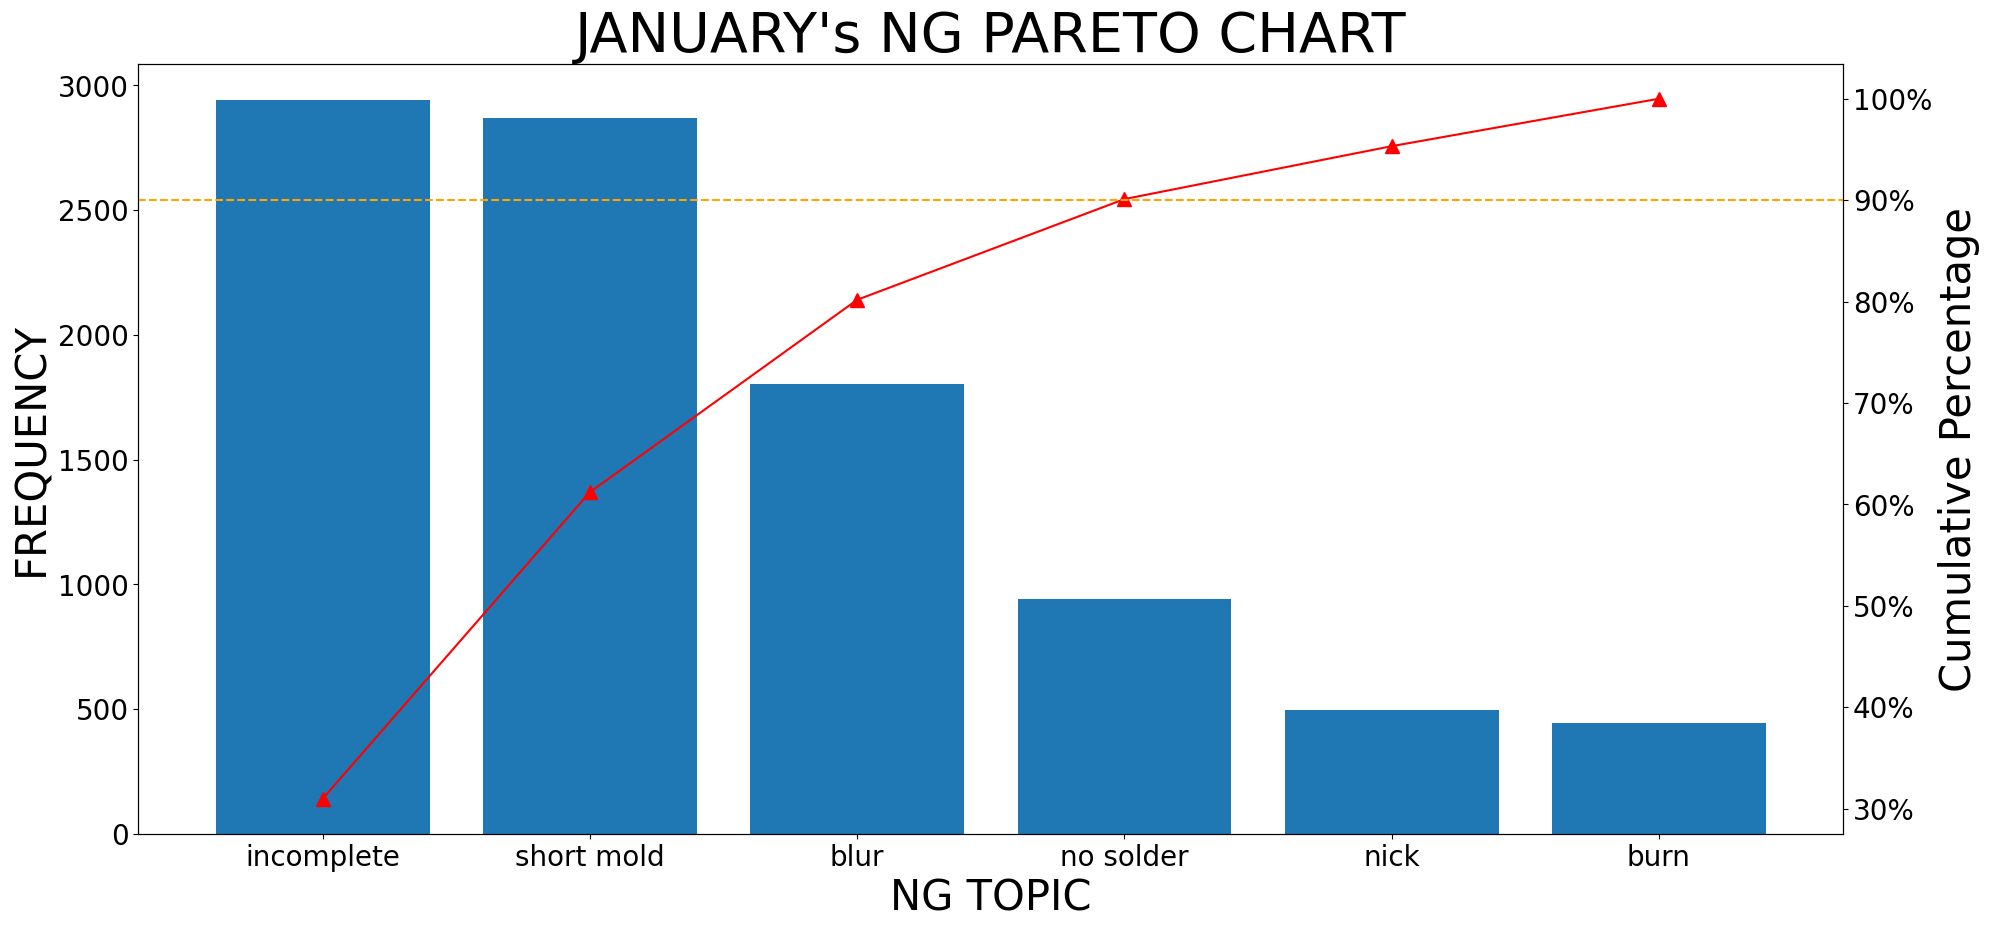

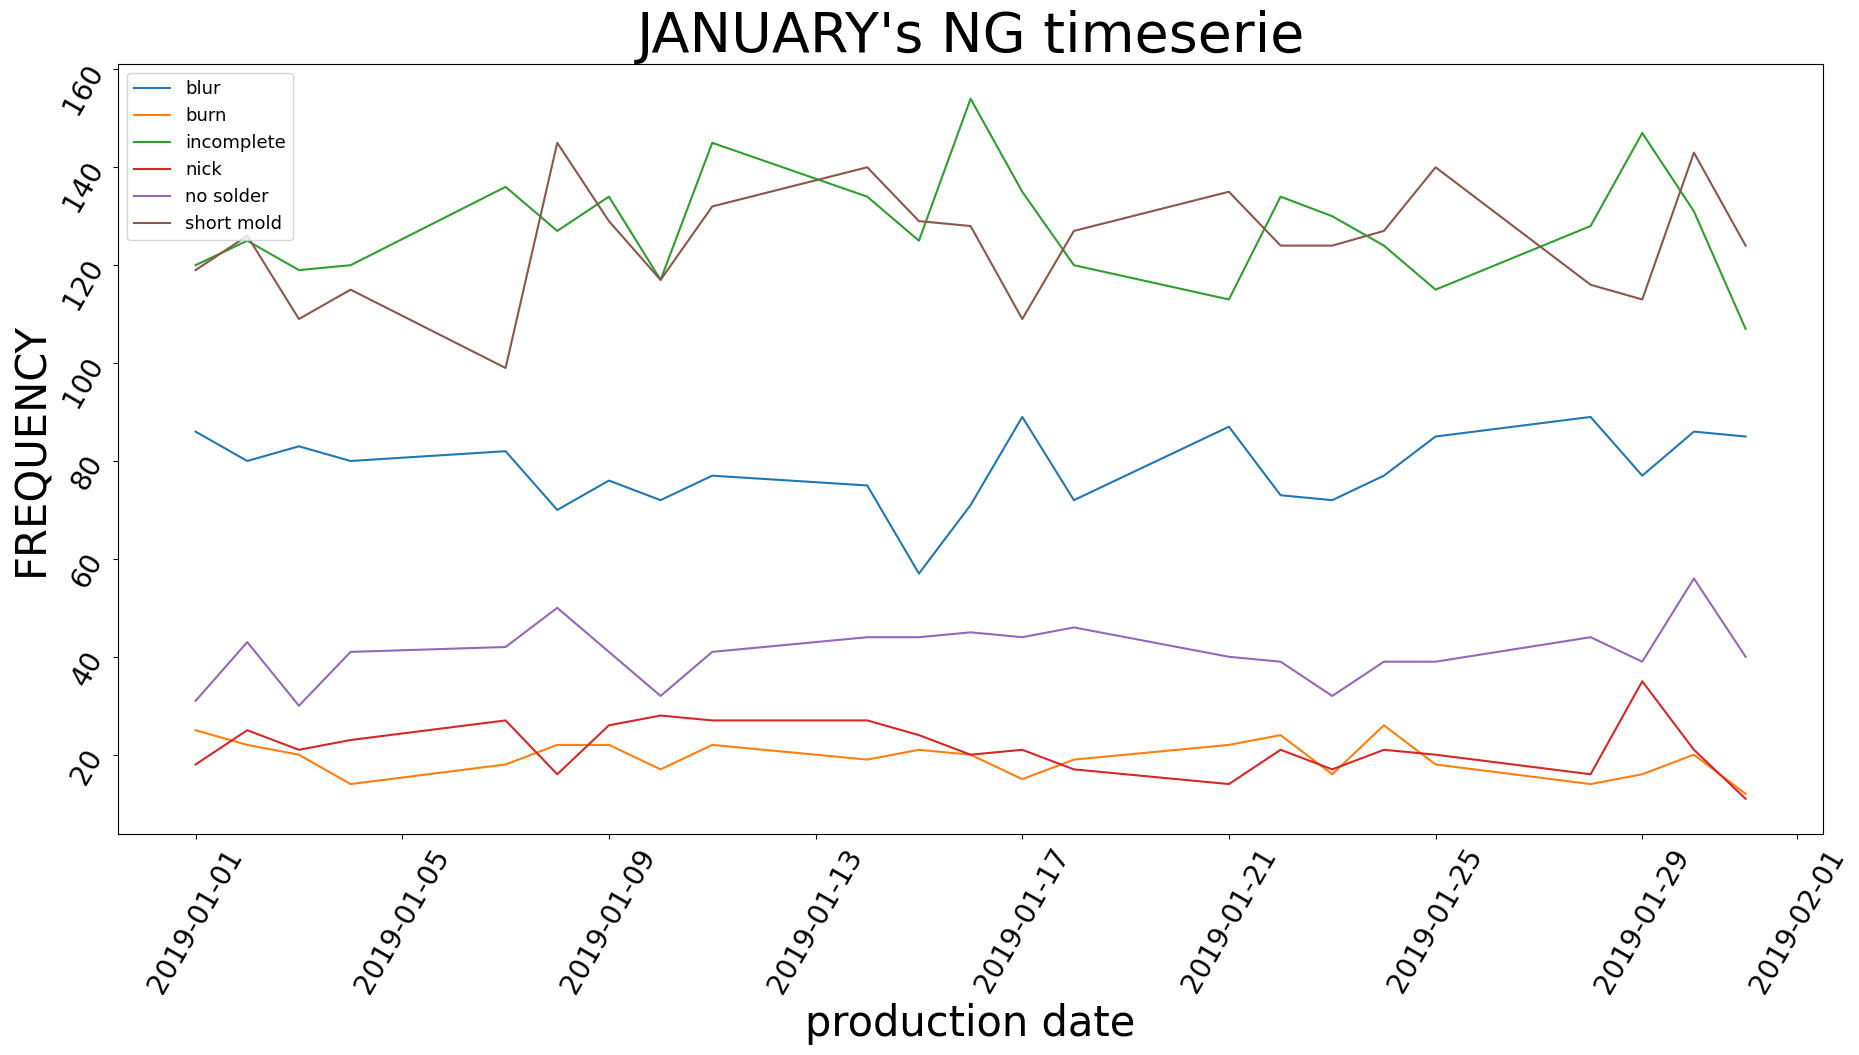

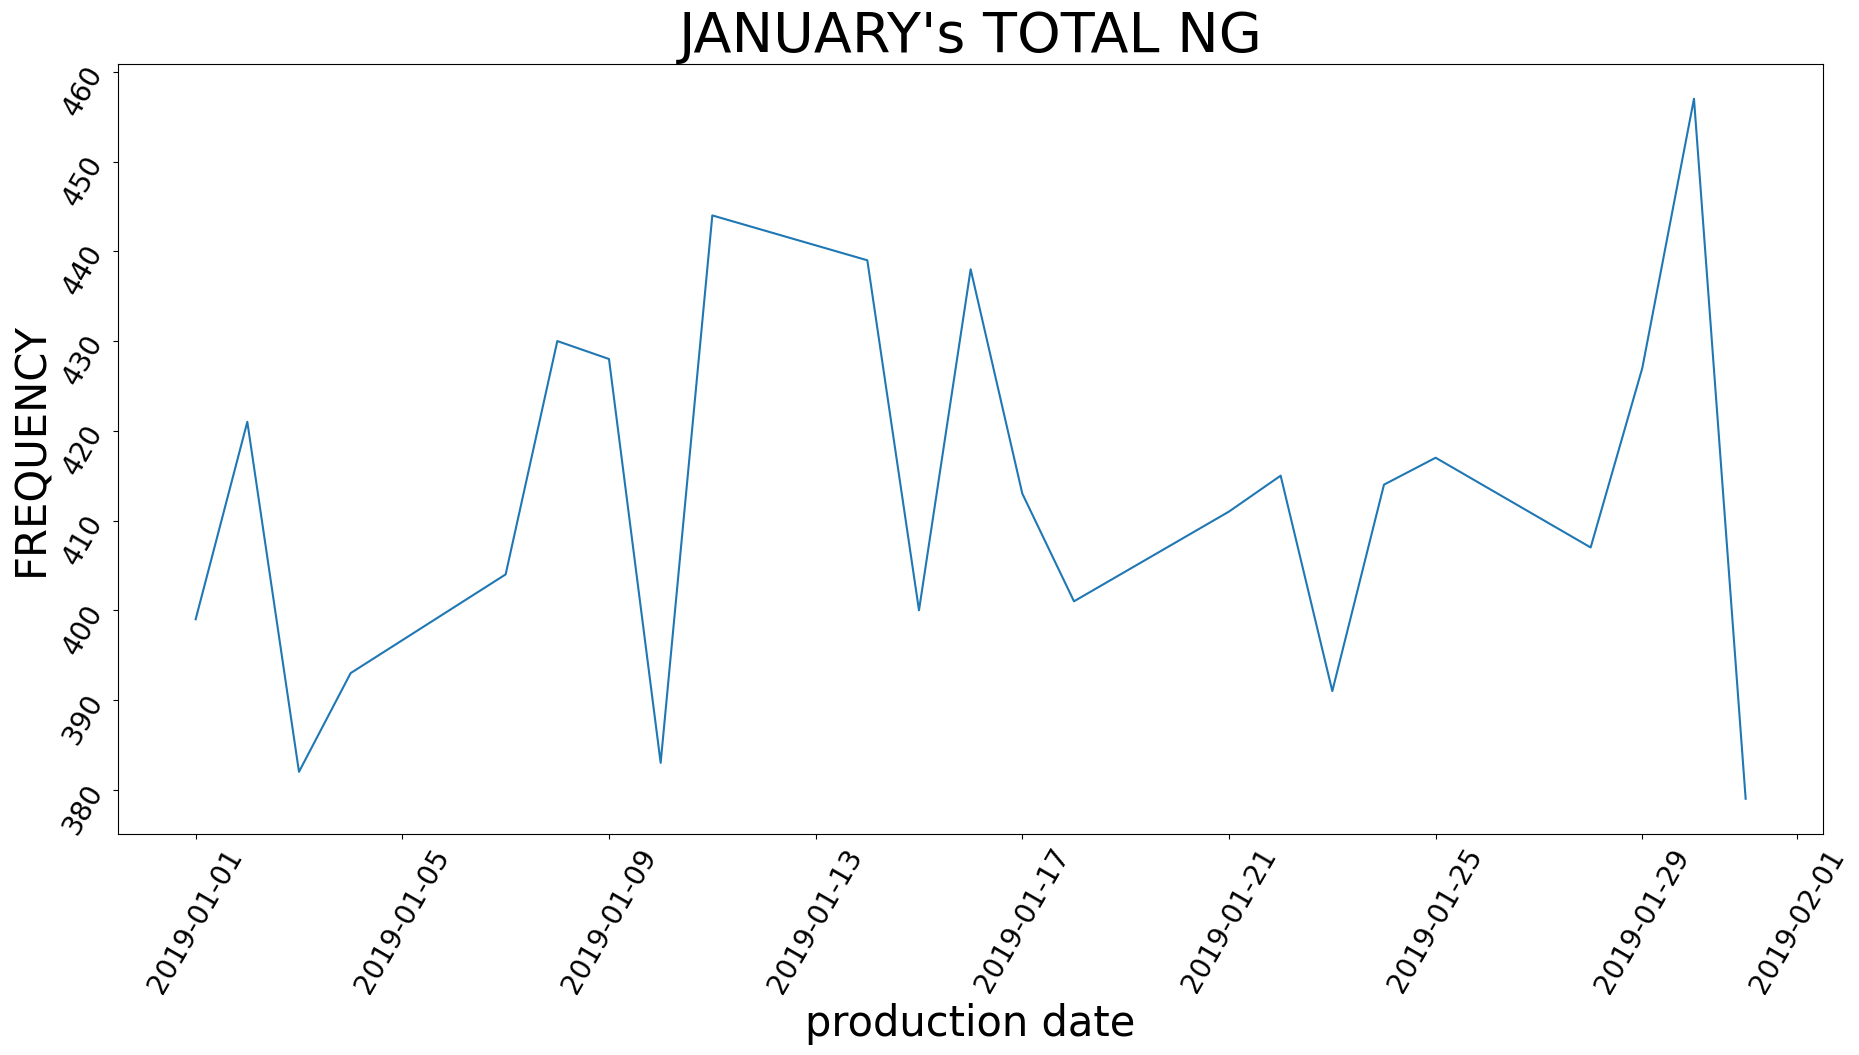

In [34]:
import tkinter as tk
from tkinter import ttk 
from tkinter import filedialog
from tkinter import messagebox

# root window
window = tk.Tk()
window.title("Production result report program")
window.geometry("640x90")
window.resizable(False,False)

# frame
frame = ttk.Frame(window)

# field options
options = {'padx':5,'pady':5}

# temperature label
file_explorer_label = ttk.Label(frame,text="Browse File",width = 85)
file_explorer_label.grid(column=0,row=0,**options)

xlxs_file_name = None

def browse_files():
    global xlxs_file_name

    file_name = filedialog.askopenfilename(initialdir = "/",
                                          title = "Select a File",
                                          filetypes = (("excel files",
                                                        "*.xlsx*"),
                                                       ("all files",
                                                        "*.*")))
    xlxs_file_name = file_name     
    file_explorer_label.configure(text=xlxs_file_name)

# browse button
browse_button = ttk.Button(frame,text="browse files")
browse_button.grid(column=1,row=0,**options)
browse_button.configure(command=browse_files)


def create_report_button_clicked():
    """create prodution report"""
    try:
        global xlxs_file_name
        ng_monthly_report_ptt(xlxs_file_name)
        file_explorer_label.config(text="create report complete!!!")
        messagebox.showinfo("info","Done")
    except Exception as e:
        messagebox.showerror("Error!!",e)
        

# create report button
create_report_button = ttk.Button(frame,text="CREATE!")
create_report_button.grid(columnspan=2,row=2,**options)
create_report_button.configure(command=create_report_button_clicked)

# add frame
frame.grid(pady=10,padx=10)

window.mainloop() #run

## Build

In [36]:
!pyinstaller.exe --noconsole create_production_report.py

2011 INFO: PyInstaller: 5.13.0
2011 INFO: Python: 3.11.3 (conda)
2058 INFO: Platform: Windows-10-10.0.18363-SP0
2059 INFO: wrote d:\My Documents\Desktop\python_office\src\create_production_report.spec
2067 INFO: Extending PYTHONPATH with paths
['d:\\My Documents\\Desktop\\python_office\\src']
3458 INFO: checking Analysis
3458 INFO: Building Analysis because Analysis-00.toc is non existent
3459 INFO: Initializing module dependency graph...
3467 INFO: Caching module graph hooks...
3548 INFO: Analyzing base_library.zip ...
11613 INFO: Loading module hook 'hook-heapq.py' from 'C:\\Users\\lbj6639\\Miniconda3\\envs\\python_office\\Lib\\site-packages\\PyInstaller\\hooks'...
12006 INFO: Loading module hook 'hook-encodings.py' from 'C:\\Users\\lbj6639\\Miniconda3\\envs\\python_office\\Lib\\site-packages\\PyInstaller\\hooks'...
19261 INFO: Loading module hook 'hook-pickle.py' from 'C:\\Users\\lbj6639\\Miniconda3\\envs\\python_office\\Lib\\site-packages\\PyInstaller\\hooks'...
24857 INFO: Caching